In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster

In [26]:
df=pd.read_csv('Iris.csv')

In [27]:
df = df.drop("Id", axis=1)
true_labels = df["Species"]
X = df.drop("Species", axis=1)

In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

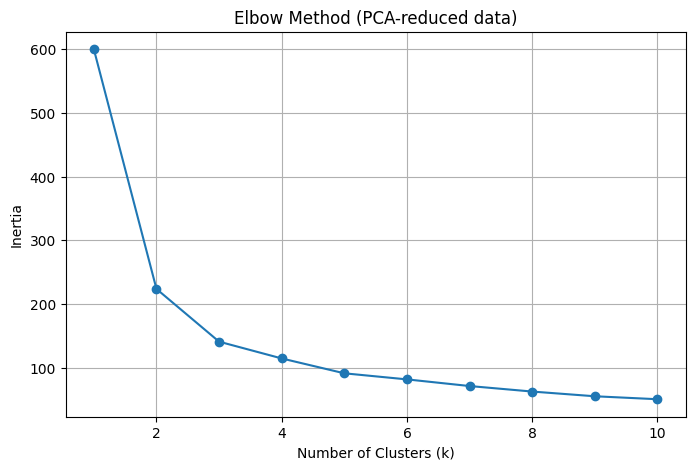

In [30]:
inertia_values = []

for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia_values.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1,11), inertia_values, marker='o')
plt.title("Elbow Method (PCA-reduced data)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

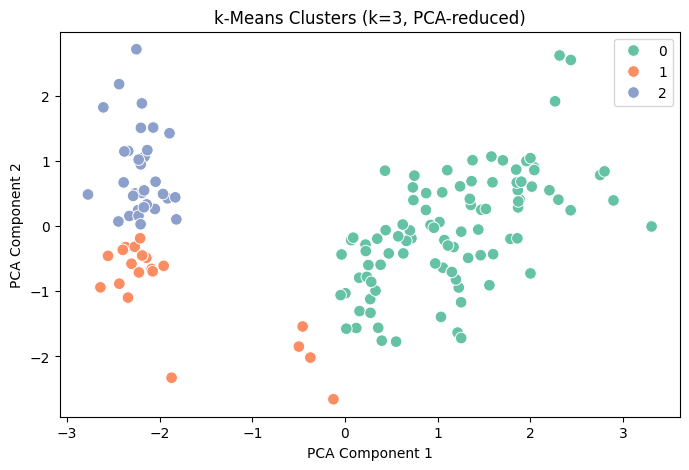

In [31]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
labels = kmeans.fit_predict(X_pca)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='Set2', s=70)
plt.title(f"k-Means Clusters (k={optimal_k}, PCA reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

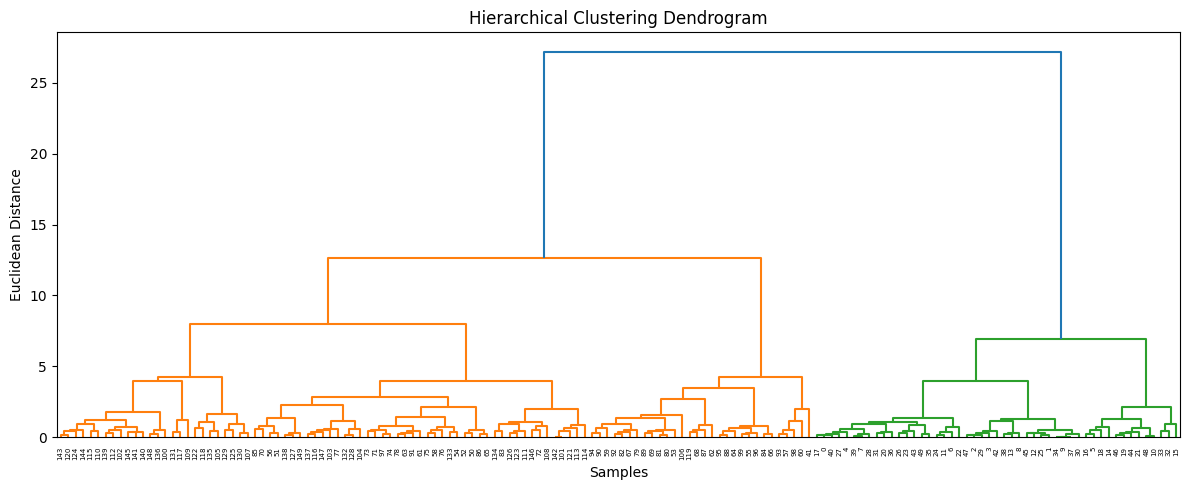

In [32]:
#denengoram
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(12, 5))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.tight_layout()
plt.show()

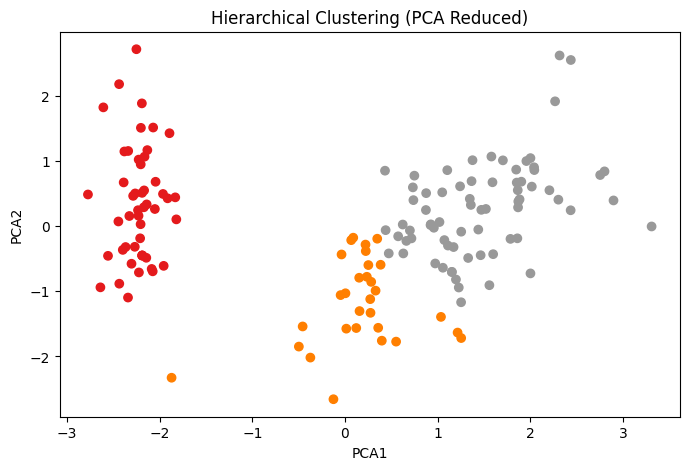

In [34]:
h_labels = fcluster(linked, 3, criterion='maxclust')

plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=h_labels, cmap='Set1')
plt.title('Hierarchical Clustering (PCA Reduced)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()